In [36]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import KFold   #For K-fold cross validation
#Loading the dataset
df = pd.read_csv('nhanes_breast_cancer_all_nhanes_biochemistry.csv')

l = ['Id','Breast cancer','Age']
X = df.drop(l,axis = 1)   #Feature Matrix
y = df["Breast cancer"]          #Target Variable
X.head()

,Bio_alanine aminotransferase alt (iu/l),Bio_albumin (g/l),Bio_aspartate aminotransferase ast (iu/l),Bio_bicarbonate (mmol/l),Bio_blood urea nitrogen (mg/dl),Bio_blood urea nitrogen (mmol/l),Bio_chloride (mmol/l),Bio_cholesterol (mmol/l),Bio_creatinine (umol/l),Bio_gamma glutamyl transferase (u/l),...,"Bio_iron, refrigerated serum (umol/l)",Bio_osmolality (mmol/kg),Bio_phosphorus (mmol/l),Bio_potassium (mmol/l),Bio_sodium (mmol/l),Bio_total bilirubin (umol/l),Bio_total calcium (mmol/l),Bio_total protein (g/l),"Bio_triglycerides, refrigerated (mmol/l)",Bio_uric acid (umol/l)
0,21.0,40.0,21.0,25.0,15.0,5.4,101.7,6.08,53.0,22.0,...,15.58,277.0,1.227,4.13,138.3,5.1,2.275,71.0,2.269,285.5
1,23.0,45.0,25.0,27.0,16.0,5.7,101.8,6.28,61.9,28.0,...,13.07,281.0,1.130,4.16,140.9,8.6,2.325,74.0,1.106,267.7
2,13.0,45.0,19.0,23.0,17.0,6.1,104.0,6.78,44.2,20.0,...,14.51,287.0,1.130,4.64,143.5,12.0,2.400,77.0,1.039,243.9
3,9.0,47.0,16.0,25.0,7.0,2.5,102.4,3.26,35.4,8.0,...,3.40,279.0,1.195,4.62,141.4,13.7,2.375,70.0,0.474,190.3
4,27.0,42.0,32.0,30.0,18.0,6.4,104.0,4.60,61.9,30.0,...,15.04,289.0,1.162,3.97,144.6,23.9,2.450,68.0,1.219,279.6


# Wrapper method: Backward Elimination
- As the name suggest, we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.
- The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.
- We will first run one iteration here just to get an idea of the concept and then we will run the same code in a loop, which will give the final set of features. Here we are using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.


In [37]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                                        0.093619
Bio_alanine aminotransferase alt (iu/l)      0.062738
Bio_albumin (g/l)                            0.445294
Bio_aspartate aminotransferase ast (iu/l)    0.022244
Bio_bicarbonate (mmol/l)                     0.000014
Bio_blood urea nitrogen (mg/dl)              0.443539
Bio_blood urea nitrogen (mmol/l)             0.436295
Bio_chloride (mmol/l)                        0.003086
Bio_cholesterol (mmol/l)                     0.000148
Bio_creatinine (umol/l)                      0.337477
Bio_gamma glutamyl transferase (u/l)         0.310234
Bio_globulin (g/l)                           0.412057
Bio_glucose, refrigerated serum (mmol/l)     0.956270
Bio_iron, refrigerated serum (umol/l)        0.595870
Bio_osmolality (mmol/kg)                     0.372835
Bio_phosphorus (mmol/l)                      0.141982
Bio_potassium (mmol/l)                       0.271440
Bio_sodium (mmol/l)                          0.645898
Bio_total bilirubin (umol/l)

In [38]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Bio_aspartate aminotransferase ast (iu/l)', 'Bio_bicarbonate (mmol/l)', 'Bio_blood urea nitrogen (mmol/l)', 'Bio_chloride (mmol/l)', 'Bio_cholesterol (mmol/l)', 'Bio_osmolality (mmol/kg)', 'Bio_total protein (g/l)', 'Bio_uric acid (umol/l)']


In [39]:
data=df.copy()
data = data.rename(columns={'Breast cancer': 'diagnosis'})
#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(792, 25)
(340, 25)


In [40]:
prediction_var = selected_features_BE

In [41]:
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation


In [42]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model

In [43]:
train_X = train[prediction_var]# taking the training data input 
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

In [44]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model

In [45]:
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of dignosis column for test inputs

In [47]:
metrics.accuracy_score(prediction,test_y) # to check the accuracy


0.7205882352941176

In [48]:
# SVM

In [49]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.55

In [50]:
# *Now lets do this for all feature_mean so that from Random forest we can get the feature which are important**

In [51]:
prediction_var = X.columns # taking all features


In [52]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [53]:
model=RandomForestClassifier(n_estimators=100)


In [54]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.7235294117647059

In [55]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

Bio_glucose, refrigerated serum (mmol/l)     0.068796
Bio_uric acid (umol/l)                       0.063774
Bio_blood urea nitrogen (mmol/l)             0.061424
Bio_creatinine (umol/l)                      0.059131
Bio_blood urea nitrogen (mg/dl)              0.058471
Bio_total protein (g/l)                      0.057484
Bio_osmolality (mmol/kg)                     0.055338
Bio_bicarbonate (mmol/l)                     0.050147
Bio_cholesterol (mmol/l)                     0.049706
Bio_gamma glutamyl transferase (u/l)         0.048436
Bio_triglycerides, refrigerated (mmol/l)     0.045035
Bio_iron, refrigerated serum (umol/l)        0.041015
Bio_globulin (g/l)                           0.040568
Bio_aspartate aminotransferase ast (iu/l)    0.039662
Bio_total calcium (mmol/l)                   0.036672
Bio_alanine aminotransferase alt (iu/l)      0.036112
Bio_potassium (mmol/l)                       0.035996
Bio_chloride (mmol/l)                        0.035263
Bio_phosphorus (mmol/l)     

In [56]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.47352941176470587

In [57]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [58]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.7382352941176471

In [59]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.47352941176470587

# f

In [67]:
x_train,y_train= train_X,train_y
x_test,y_test = test_X,test_y

from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter = 200)
lgr.fit(train_X,train_y)
print("our accuracy is:{}".format(lgr.score(test_X,test_y)))

our accuracy is:0.7352941176470589


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
#We can evaluate our model so and we have y_predict and y_true(y_test)
from sklearn.metrics import confusion_matrix
y_true = y_test 
y_pred = lgr.predict(x_test) #Predict data for eveluating 
cm = confusion_matrix(y_true,y_pred)

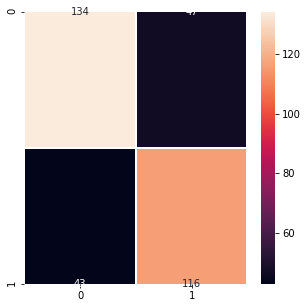

In [69]:
#We draw heatmap for showing confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidth = 1,fmt =".0f",ax = ax)